In [1]:
import numpy as np
import seaborn as sns
import pandas as pd

import matplotlib.pyplot as plt

import keijzer_exogan as ke

from sklearn.preprocessing import MinMaxScaler
from tqdm import tqdm

%matplotlib inline
%config InlineBackend.print_figure_kwargs={'facecolor' : "w"} # Make sure the axis background of plots is white, this is usefull for the black theme in JupyterLab

# Initialize default seaborn layout
sns.set_palette(sns.hls_palette(8, l=.3, s=.8))
sns.set(style='ticks') 

In [2]:
%%time
path = '/datb/16011015/ExoGAN_data/selection//' #notice how you dont put the last folder in here...
images = np.load(path+'first_chunks_25_percent_images_v4.1.npy').astype('float32')

len(images)

CPU times: user 1.8 s, sys: 9.56 s, total: 11.4 s
Wall time: 27.7 s


In [3]:
images.shape

(1250000, 1, 32, 32)

In [4]:
images = images.reshape([images.shape[0], 32, 32]) # remove the channel dimension

In [5]:
# Plot some images

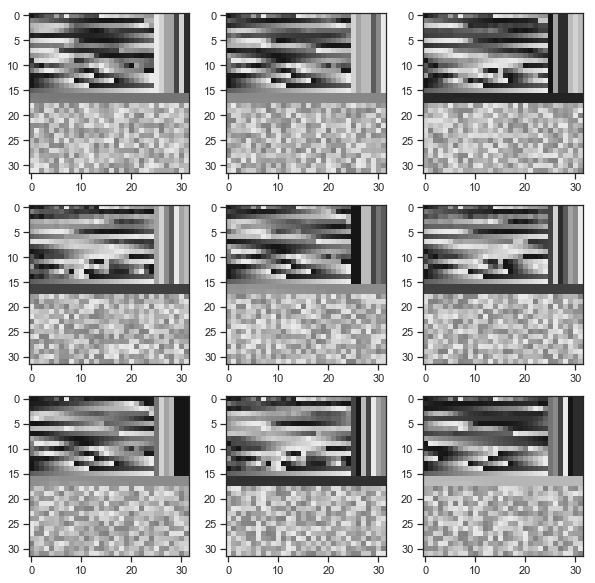

In [6]:
plt.figure(figsize=(10,10))
for i in range(9):
    n = np.random.randint(0, len(images)) # make sure the 9 images are a random selection
    img = images[n]
    plt.subplot(3,3,i+1)
    plt.imshow(img, cmap='gray', vmin=-1.2, vmax=1.2)

# Looking at the params

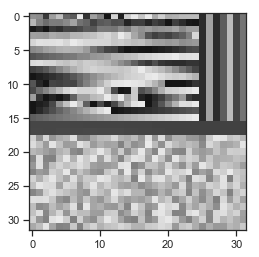

In [7]:
img = images[0] # select one image
plt.imshow(img, cmap='gray', vmin=-1.2, vmax=1.2)

In [8]:
params = ['planet_mass','temp_profile','ch4_mixratio','planet_radius','h2o_mixratio','co2_mixratio','co_mixratio']

In [9]:
%%time
params_values = [images[:, :16, 25+i:26+i].mean(1) for i in tqdm(range(len(params)))] # select param line, take mean of line, make list of all lines in ndarray per param

params_values_mean = [val.mean() for val in params_values] # mean of all values per param
params_values_std = [val.std() for val in params_values] # std of all values per param

100%|██████████| 7/7 [00:03<00:00,  2.11it/s]

CPU times: user 3.37 s, sys: 115 ms, total: 3.49 s
Wall time: 3.22 s


In [10]:
for i,param in enumerate(params):
    print(param+' \t mean: %.1f \t std: %.2f'% (params_values_mean[i], params_values_std[i]))

planet_mass 	 mean: -0.0 	 std: 0.64
temp_profile 	 mean: 0.0 	 std: 0.64
ch4_mixratio 	 mean: 0.0 	 std: 0.64
planet_radius 	 mean: -0.0 	 std: 0.64
h2o_mixratio 	 mean: 0.0 	 std: 0.64
co2_mixratio 	 mean: -0.0 	 std: 0.64
co_mixratio 	 mean: -0.0 	 std: 0.64


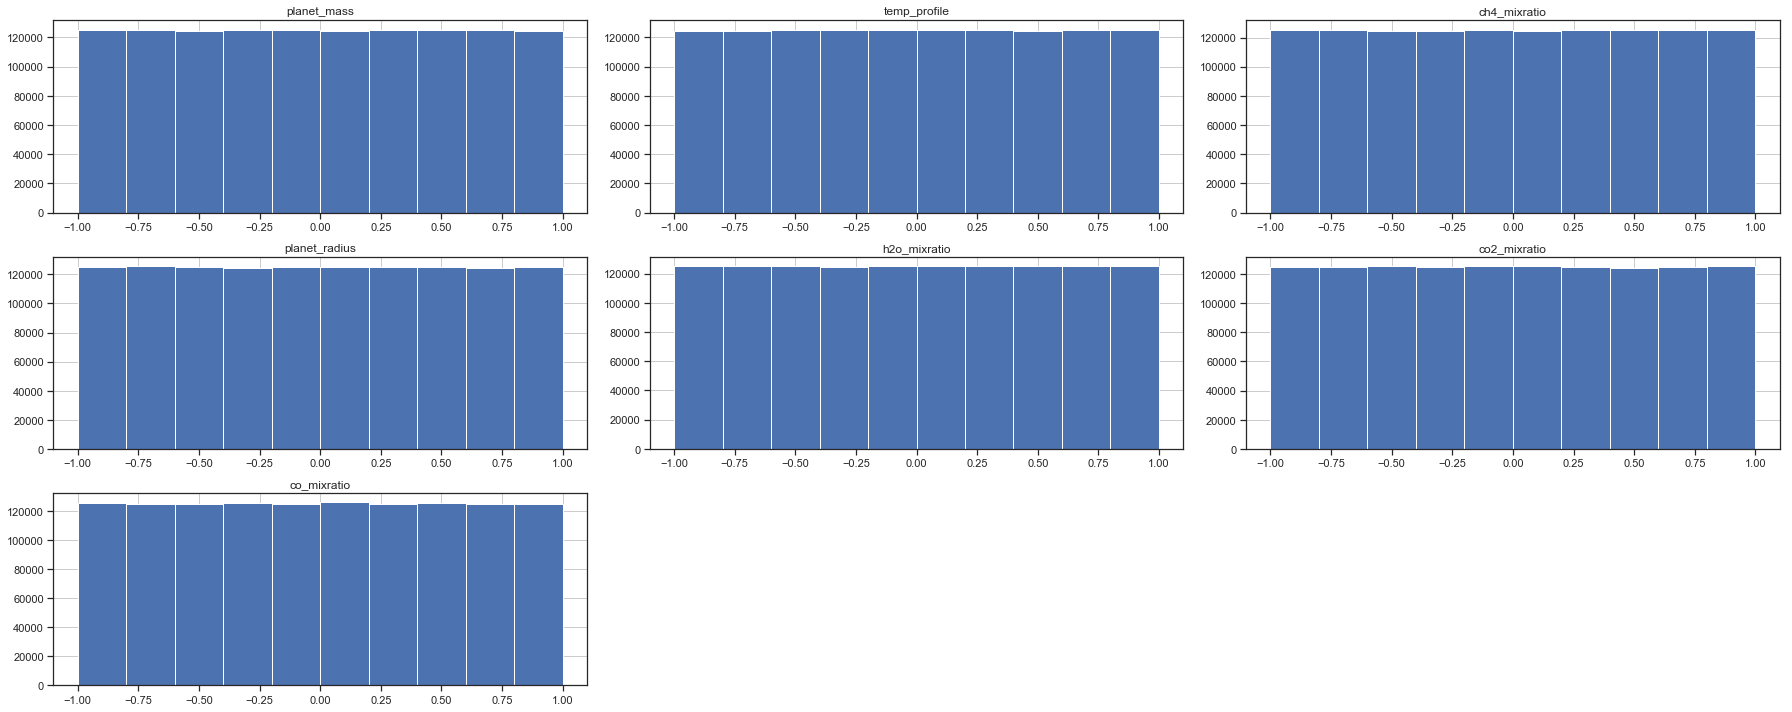

In [11]:
plt.figure(figsize=((25,10)))
for i,param_values in enumerate(params_values):
    plt.subplot(3,3,i+1)
    plt.title(params[i])
    plt.hist(param_values, bins=10)
    plt.grid()
    plt.tight_layout()

# General ASPA statistics

In [12]:
%%time

mean = images.mean()
std = images.std()
min_ = images.min()
max_= images.max()

print('mean: ', mean)
print('std: ', mean)
print('min: ', min_)
print('max: ', max_)

mean:  0.1776473
std:  0.1776473
min:  -1.0007253
max:  1.1265445
CPU times: user 24.3 s, sys: 16.4 s, total: 40.7 s
Wall time: 7.39 s


# Spectra EDA

In [13]:
spectra = images[:, :16, :25]
spectra.shape

(1250000, 16, 25)

In [14]:
mean_ = spectra.mean(0)
std_ = spectra.std(0)

# Heatmap of spectra $\mu$ and $\sigma$

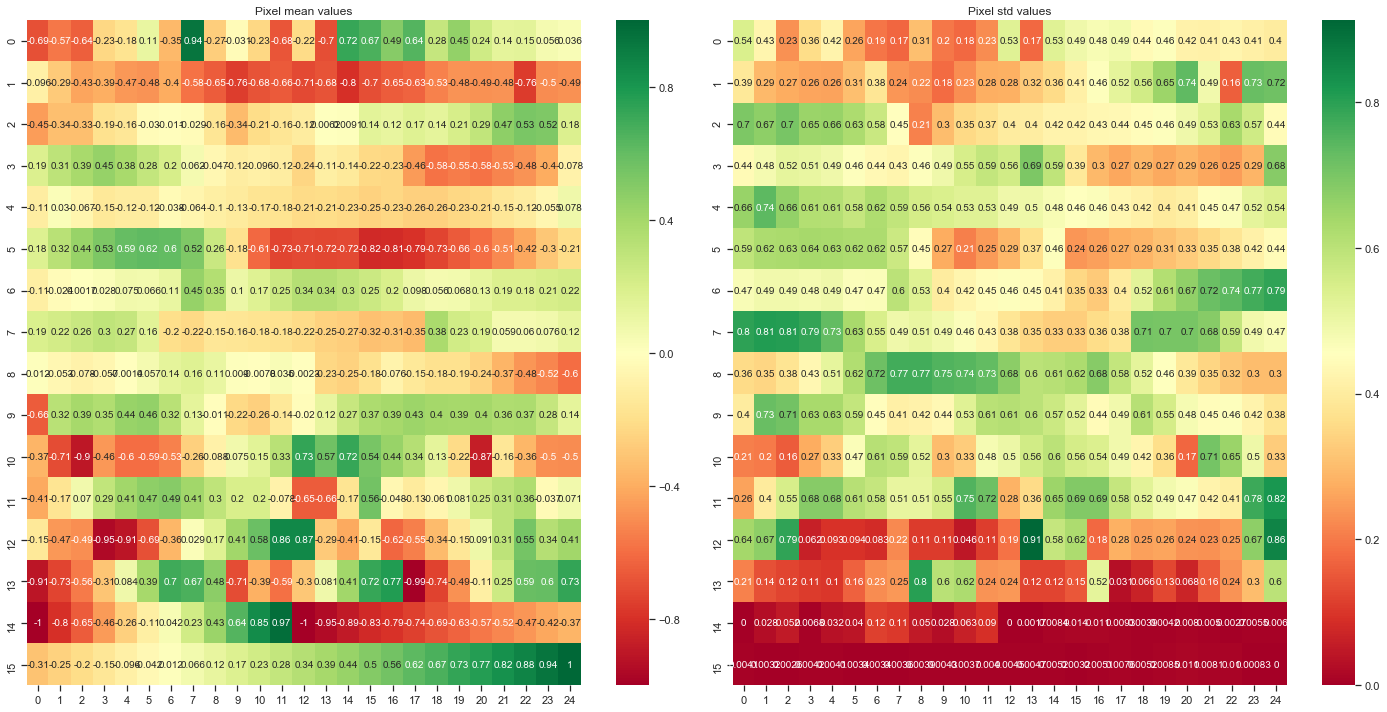

In [15]:
plt.figure(figsize=(20,10))

plt.subplot(1,2,1)
plt.title('Pixel mean values')
sns.heatmap(mean_, square=False, cmap='RdYlGn', annot=True)

plt.subplot(1,2,2)
plt.title('Pixel std values')
sns.heatmap(std_, square=False, cmap='RdYlGn', annot=True)

plt.tight_layout()

In [16]:
mins_ = [images[:, 16:17, i*2:i*2+2].mean(2) for i in range(16)]

maxs_ = [images[:, 17:18, i*2:i*2+2].mean(2) for i in range(16)]

#stds_ = [images[:, 17:18, i*2:i*4+4].mean(2) for i in range(8)]

In [17]:
for i in range(16):
    print('='*100)
    print('mins %s: \t mean: %.5f \t std: %.5f \t min: %.5f \t max: %.5f'%(i, mins_[i].mean(), mins_[i].std(), mins_[i].min(), mins_[i].max()))
    #print('stds %s: \t mean: %.3f \t std: %.3f'%(i, stds_[i].mean(), stds_[i].std()))
    print('mins %s: \t mean: %.5f \t std: %.5f \t min: %.5f \t max: %.5f'%(i, maxs_[i].mean(), maxs_[i].std(), maxs_[i].min(), maxs_[i].max()))

mins 0: 	 mean: -0.27223 	 std: 0.50621 	 min: -0.99930 	 max: 0.98780
mins 0: 	 mean: -0.26360 	 std: 0.51163 	 min: -0.99912 	 max: 1.07593
mins 1: 	 mean: -0.28498 	 std: 0.49835 	 min: -0.99933 	 max: 0.84756
mins 1: 	 mean: -0.26866 	 std: 0.50834 	 min: -0.99908 	 max: 1.00937
mins 2: 	 mean: -0.28455 	 std: 0.49875 	 min: -1.00008 	 max: 0.86833
mins 2: 	 mean: -0.26158 	 std: 0.51281 	 min: -0.99908 	 max: 1.06664
mins 3: 	 mean: -0.28829 	 std: 0.49653 	 min: -0.99960 	 max: 0.86309
mins 3: 	 mean: -0.25473 	 std: 0.51696 	 min: -0.99739 	 max: 1.12654
mins 4: 	 mean: -0.28942 	 std: 0.49595 	 min: -1.00015 	 max: 0.88773
mins 4: 	 mean: -0.25599 	 std: 0.51618 	 min: -0.99797 	 max: 1.08149
mins 5: 	 mean: -0.29353 	 std: 0.49340 	 min: -0.99972 	 max: 0.83568
mins 5: 	 mean: -0.27127 	 std: 0.50672 	 min: -0.99854 	 max: 0.97005
mins 6: 	 mean: -0.30014 	 std: 0.48966 	 min: -1.00036 	 max: 0.78472
mins 6: 	 mean: -0.28168 	 std: 0.50057 	 min: -0.99906 	 max: 0.88286
mins 7

# Mean and STD of all ASPAs per pixel

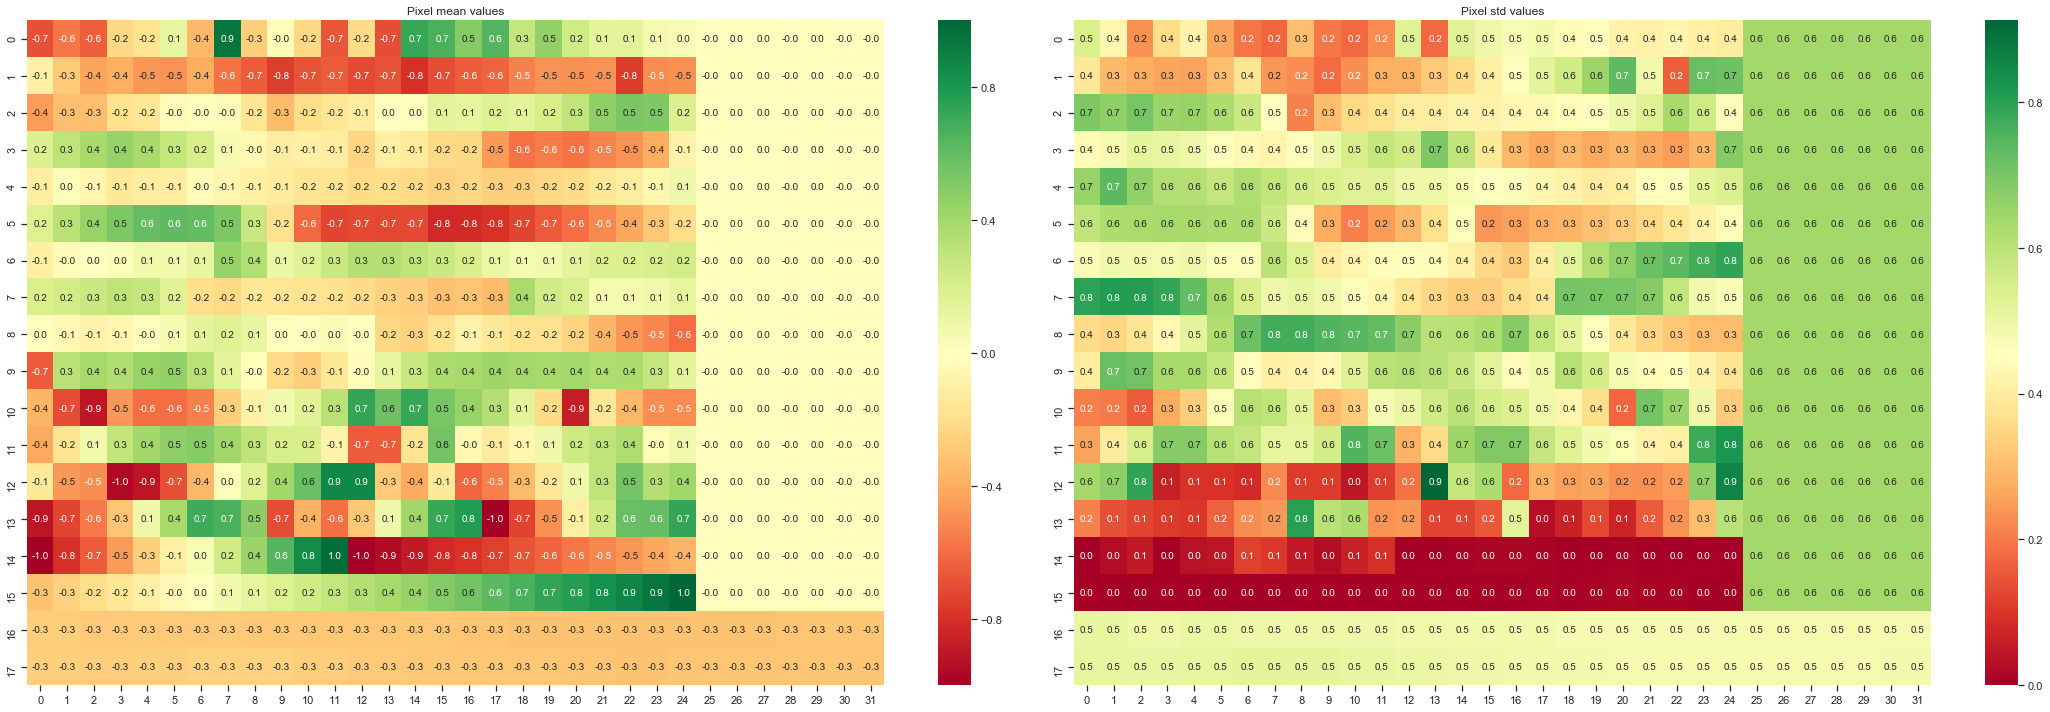

In [18]:
plt.figure(figsize=(30,10))

plt.subplot(1,2,1)
plt.title('Pixel mean values')
sns.heatmap(images[:, :18, :].mean(0), square=False, cmap='RdYlGn', annot=True, fmt='.1f')

plt.subplot(1,2,2)
plt.title('Pixel std values')
sns.heatmap(images[:, :18, :].std(0), square=False, cmap='RdYlGn', annot=True, fmt='.1f')

plt.tight_layout()

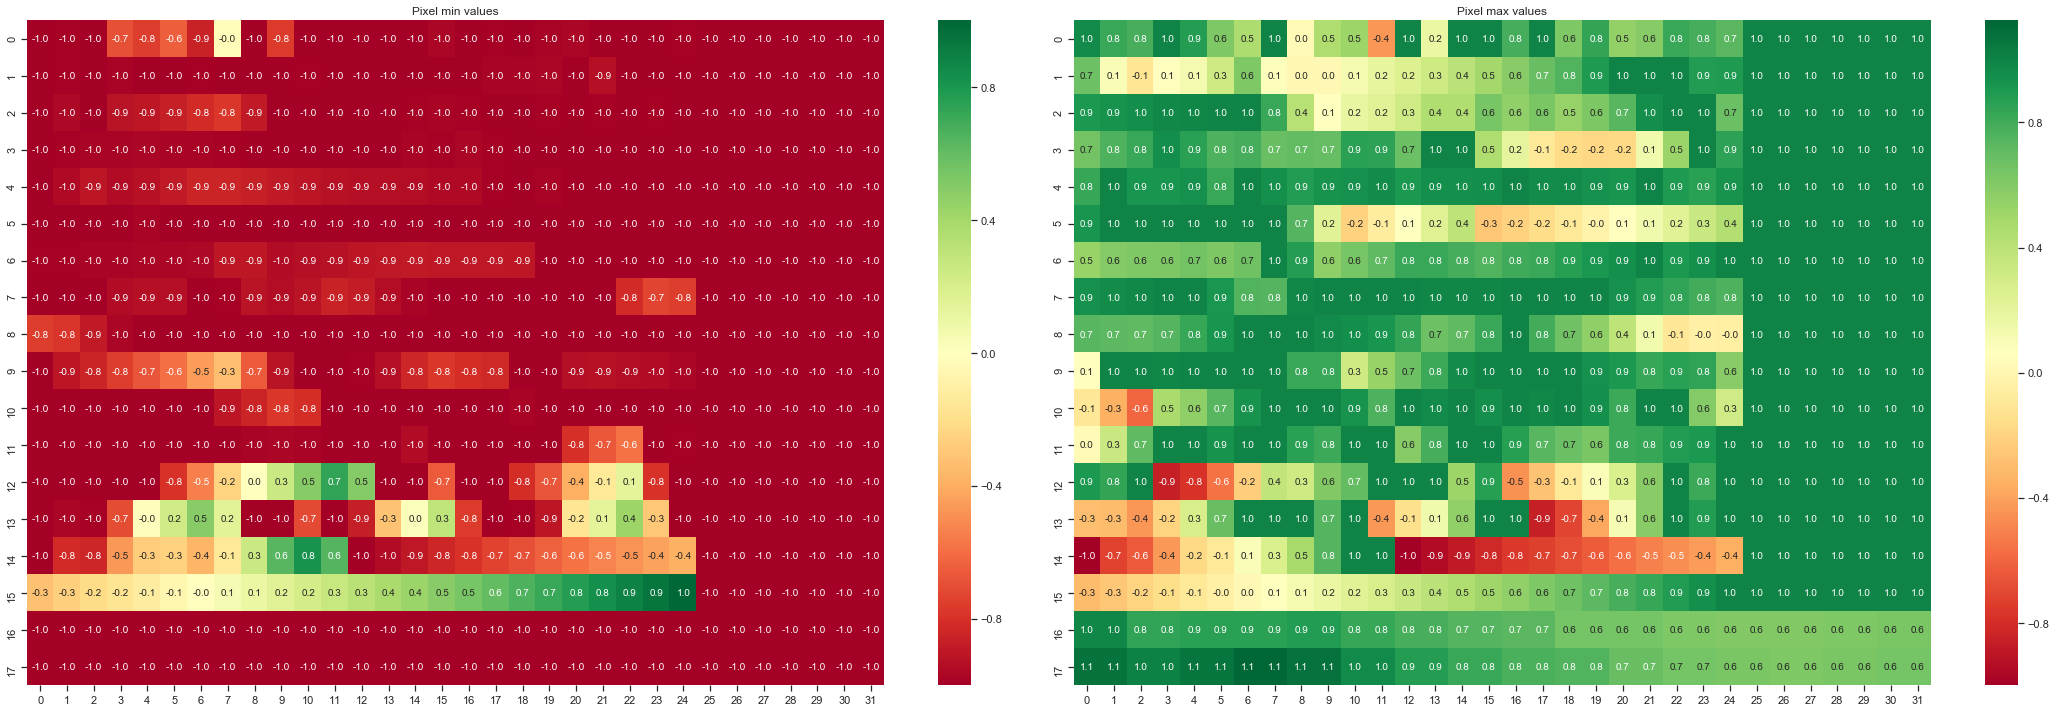

In [19]:
plt.figure(figsize=(30,10))

plt.subplot(1,2,1)
plt.title('Pixel min values')
sns.heatmap(images[:, :18, :].min(0), square=False, cmap='RdYlGn', annot=True, fmt='.1f')

plt.subplot(1,2,2)
plt.title('Pixel max values')
sns.heatmap(images[:, :18, :].max(0), square=False, cmap='RdYlGn', annot=True, fmt='.1f')

plt.tight_layout()

# EDA on individual spectra bins

In [20]:
spectra.shape

(1250000, 16, 25)

100%|██████████| 400/400 [02:10<00:00,  3.03it/s]


CPU times: user 2min 16s, sys: 2.88 s, total: 2min 18s
Wall time: 2min 19s


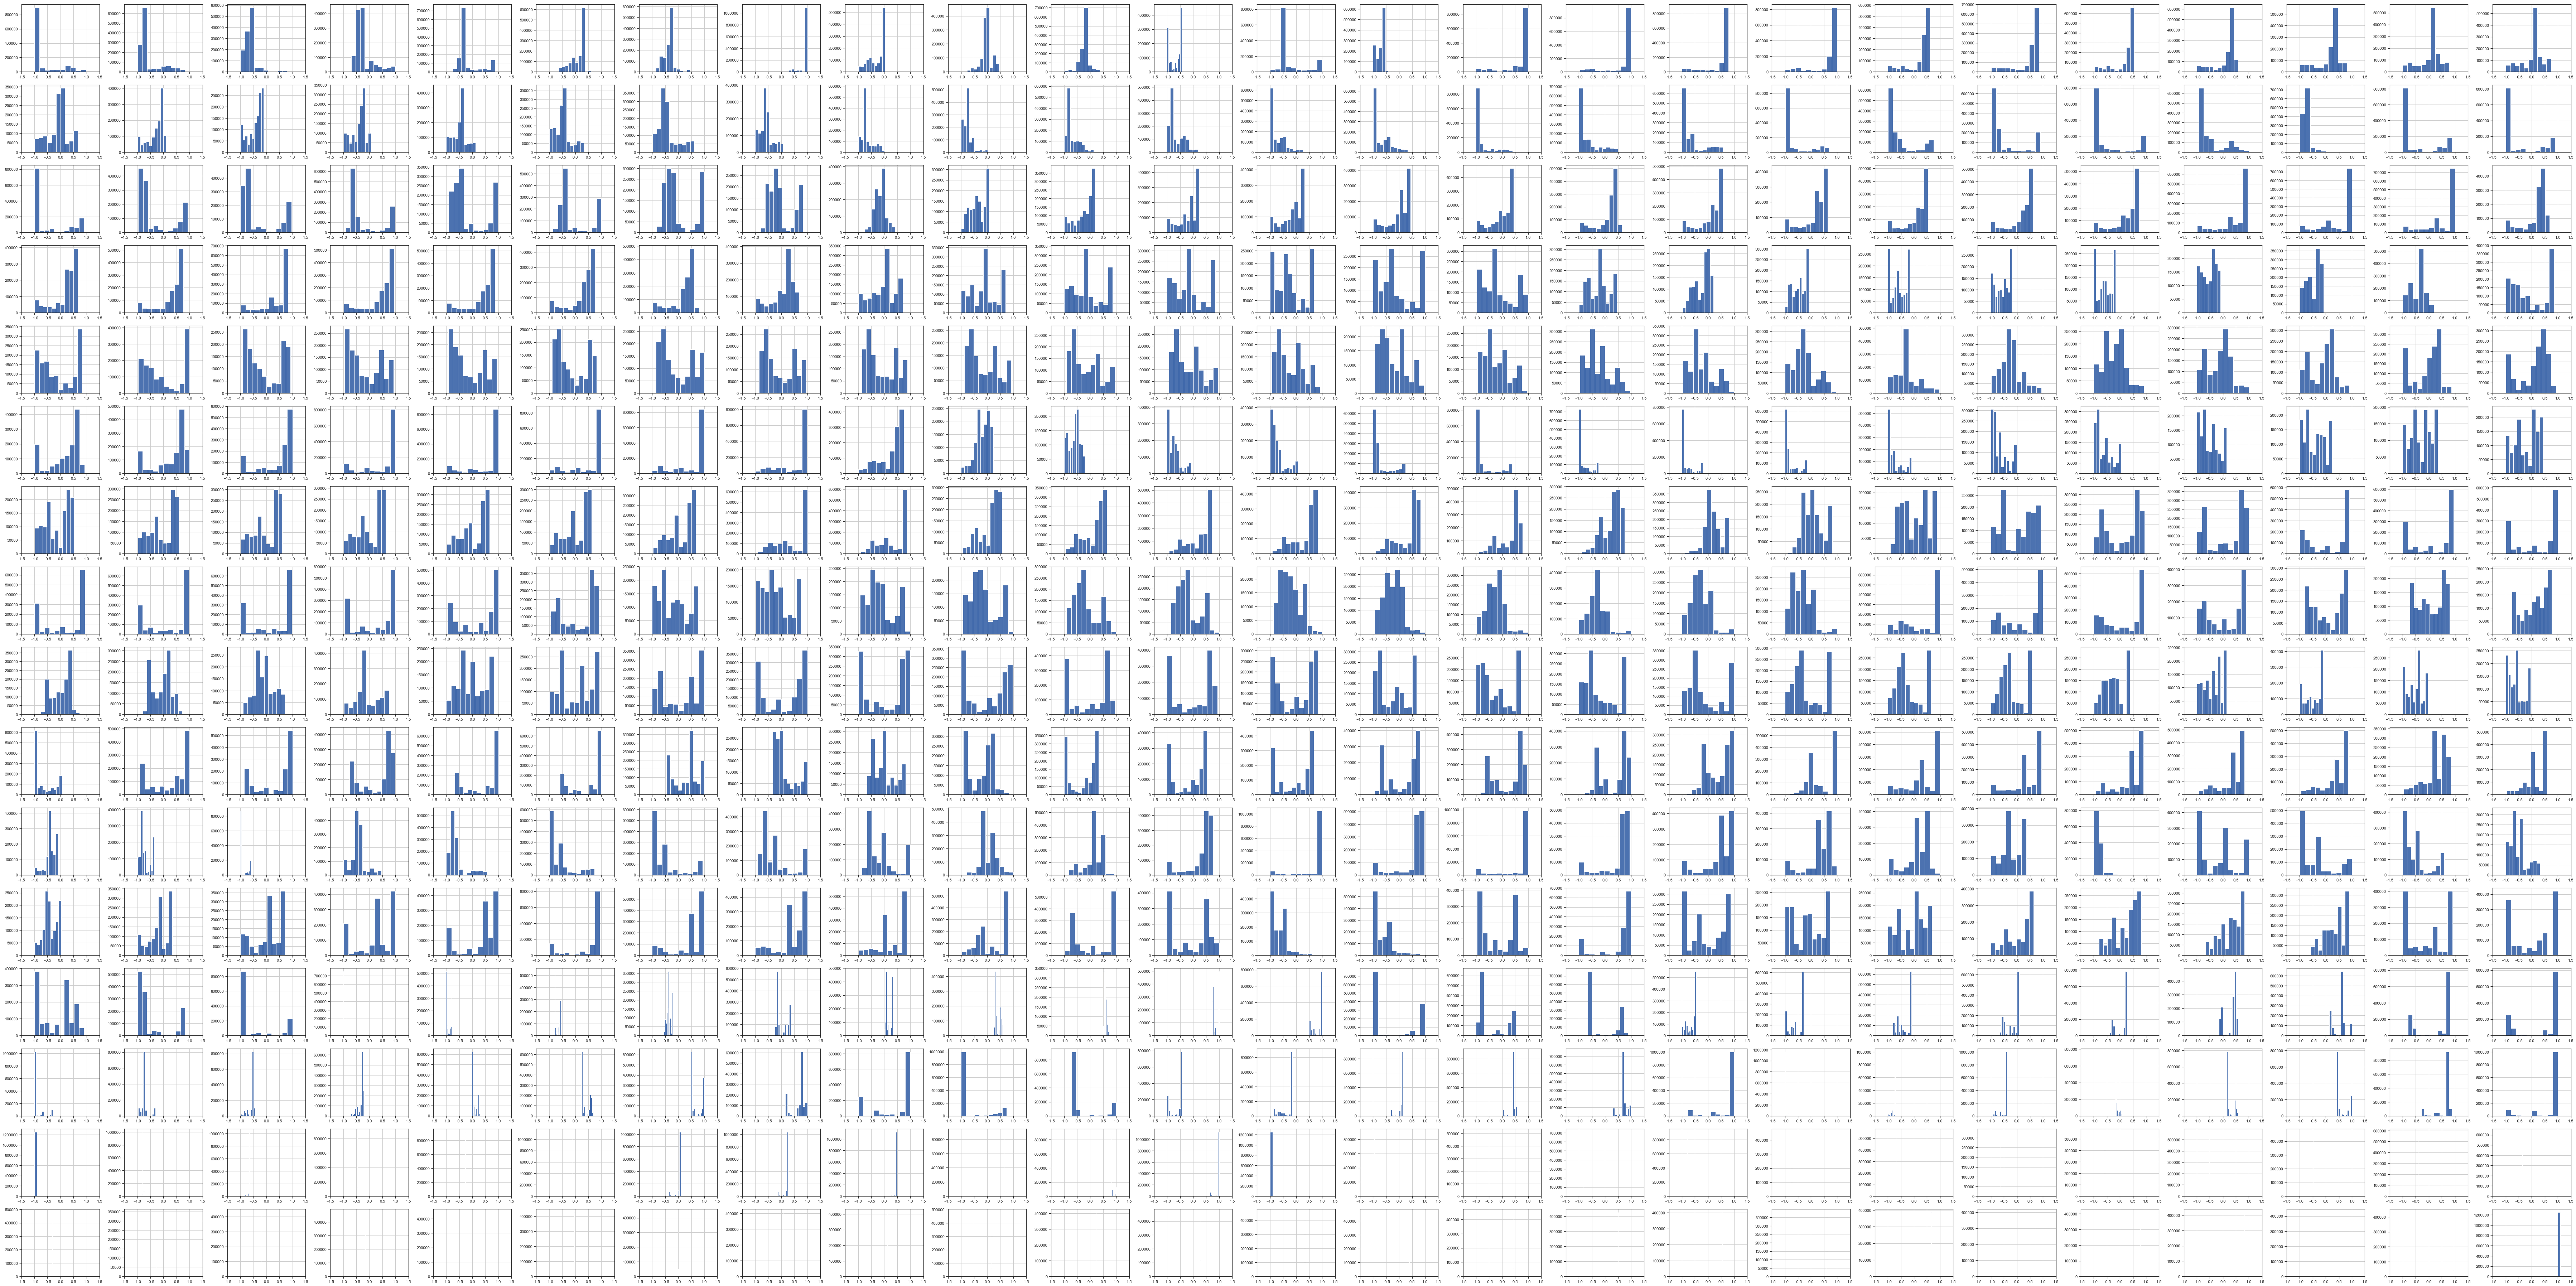

In [21]:
%%time
spec = spectra.flatten()
plt.figure(figsize=(100,50))

row_value = 0
column_value = 0

for i in tqdm(range(25*16)):
    
    if (i % 25 == 0) and i != 0: # move one row down at end of column and reset row value 
        #print('set to 0')
        row_value = 0
        column_value += 1
    
    plt.subplot(16,25,i+1)
    #plt.title('Bin %s' % (i+1))
    plt.hist(spectra[:, column_value, row_value], bins=10)
    plt.grid()
    plt.xlim((-1.5,1.5))
    
    row_value += 1
    
plt.tight_layout()

In [22]:
spec.shape

(500000000,)